In [121]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

pd.set_option('precision', 6)
pd.set_option('display.max_rows', 10)

%matplotlib inline


In [67]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf

In [68]:
yf.pdr_override() # to override pandas_datareader.data.get_data_yahoo() method

In [69]:
paper = pd.read_csv('PreisMoatStanley2013.dat',
                    delimiter = ' ',
                    parse_dates=[0, 1, 100, 101])

print(paper.shape)
paper.head()

(373, 102)


,Google Start Date,Google End Date,arts,banking,bonds,bubble,buy,cancer,car,cash,...,trader,train,transaction,travel,unemployment,war,water,world,DJIA Date,DJIA Closing Price
0,2004-01-04,2004-01-10,0.956667,0.193333,0.203333,0.183333,2.41667,0.913333,4.19333,0.326667,...,0.346667,0.706667,0.050000,2.06000,0.336667,2.02000,1.91333,4.83333,2004-01-12,10485.18
1,2004-01-11,2004-01-17,0.970000,0.203333,0.186667,0.190000,2.31667,0.940000,4.22000,0.320000,...,0.346667,0.676667,0.050000,2.05333,0.296667,2.09333,1.93333,4.76667,2004-01-20,10528.66
2,2004-01-18,2004-01-24,0.926667,0.196667,0.190000,0.173333,2.35000,0.906667,4.10667,0.320000,...,0.356667,0.713333,0.056667,2.01333,0.310000,1.97333,1.89333,4.60000,2004-01-26,10702.51
3,2004-01-25,2004-01-31,0.950000,0.196667,0.180000,0.196667,2.26667,0.906667,3.99333,0.330000,...,0.336667,0.710000,0.060000,1.91333,0.296667,1.90667,1.92000,4.53333,2004-02-02,10499.18
4,2004-02-01,2004-02-07,0.893333,0.203333,0.183333,0.173333,2.08333,0.913333,3.84000,0.303333,...,0.326667,0.630000,0.050000,1.76667,0.290000,2.08667,1.88667,4.53333,2004-02-09,10579.03


In [70]:
columns = [column for column in paper.columns]
# print([column for column in paper.columns])
columns

['Google Start Date',
 'Google End Date',
 'arts',
 'banking',
 'bonds',
 'bubble',
 'buy',
 'cancer',
 'car',
 'cash',
 'chance',
 'color',
 'conflict',
 'consume',
 'consumption',
 'crash',
 'credit',
 'crisis',
 'culture',
 'debt',
 'default',
 'derivatives',
 'dividend',
 'dow jones',
 'earnings',
 'economics',
 'economy',
 'energy',
 'environment',
 'fed',
 'finance',
 'financial markets',
 'fine',
 'fond',
 'food',
 'forex',
 'freedom',
 'fun',
 'gain',
 'gains',
 'garden',
 'gold',
 'greed',
 'growth',
 'happy',
 'headlines',
 'health',
 'hedge',
 'holiday',
 'home',
 'house',
 'housing',
 'inflation',
 'invest',
 'investment',
 'kitchen',
 'labor',
 'leverage',
 'lifestyle',
 'loss',
 'markets',
 'marriage',
 'metals',
 'money',
 'movie',
 'nasdaq',
 'nyse',
 'office',
 'oil',
 'opportunity',
 'ore',
 'politics',
 'portfolio',
 'present',
 'profit',
 'rare earths',
 'religion',
 'restaurant',
 'return',
 'returns',
 'revenue',
 'rich',
 'ring',
 'risk',
 'sell',
 'short sell',


In [71]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'], 
                     'debt': paper['debt'].astype(np.float64),
                     'DJIADate': paper['DJIA Date'],
                     'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})

data.head()

,DJIAClose,DJIADate,GoogleWE,debt
0,10485.18,2004-01-12,2004-01-10,0.210000
1,10528.66,2004-01-20,2004-01-17,0.210000
2,10702.51,2004-01-26,2004-01-24,0.210000
3,10499.18,2004-02-02,2004-01-31,0.213333
4,10579.03,2004-02-09,2004-02-07,0.200000


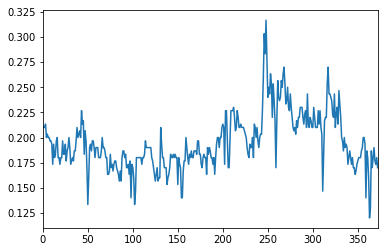

In [72]:
data.debt.plot();

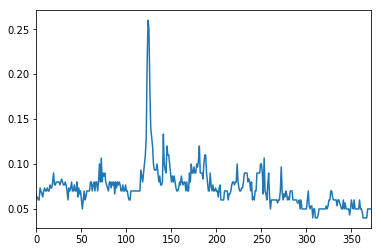

In [73]:
paper['hedge'].plot();

In [74]:
# to gather our own DJIA data from Quandl

import quandl

quandl.authtoken = 'ko-Mc-BiaTFCKQKo4WPx'

In [75]:
quandl.ApiConfig.api_key = 'ko-Mc-BiaTFCKQKo4WPx'

In [76]:
djia = quandl.get('BCB/UDJIAD1',
                 start_date='2004-01-01',
                 end_date='2011-03-05')

djia.head()

,Value
Date,
2004-01-02,10409.85
2004-01-05,10544.07
2004-01-06,10538.66
2004-01-07,10529.03
2004-01-08,10592.44


In [77]:
djia.shape

(1806, 1)

In [78]:
djia.columns = ['Close']
djia_closes = djia.reset_index()
djia_closes.head()

,Date,Close
0,2004-01-02,10409.85
1,2004-01-05,10544.07
2,2004-01-06,10538.66
3,2004-01-07,10529.03
4,2004-01-08,10592.44


In [79]:
data.head()

,DJIAClose,DJIADate,GoogleWE,debt
0,10485.18,2004-01-12,2004-01-10,0.210000
1,10528.66,2004-01-20,2004-01-17,0.210000
2,10702.51,2004-01-26,2004-01-24,0.210000
3,10499.18,2004-02-02,2004-01-31,0.213333
4,10579.03,2004-02-09,2004-02-07,0.200000


In [80]:
# merge the data provided by the paper authors and the data gotten from quandl
data_merged = pd.merge(data, djia_closes, left_on='DJIADate', right_on='Date')
data_merged.drop(['DJIADate'], inplace=True, axis=1)
data_merged.set_index('Date', inplace=True)
data_merged.head()

,DJIAClose,GoogleWE,debt,Close
Date,,,,
2004-01-12,10485.18,2004-01-10,0.210000,10485.18
2004-01-20,10528.66,2004-01-17,0.210000,10528.66
2004-01-26,10702.51,2004-01-24,0.210000,10702.51
2004-02-02,10499.18,2004-01-31,0.213333,10499.18
2004-02-09,10579.03,2004-02-07,0.200000,10579.03


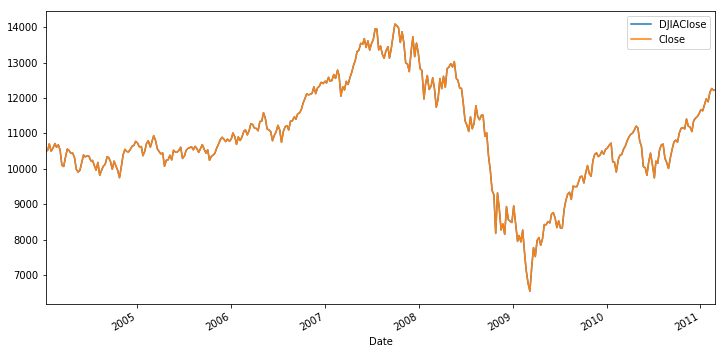

In [81]:
data_merged[['DJIAClose', 'Close']].plot(figsize=(12, 6));

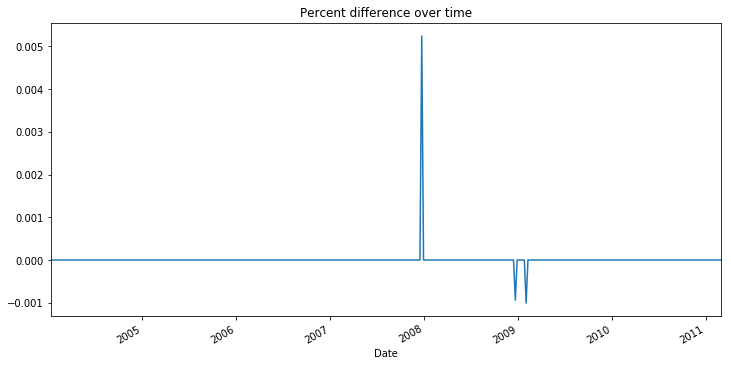

In [82]:
((data_merged.DJIAClose - data_merged.Close) * 100/ data_merged.Close). \
     plot(figsize=(12, 6), title='Percent difference over time');

In [83]:
data_merged[data_merged.DJIAClose != data_merged.Close]

,DJIAClose,GoogleWE,debt,Close
Date,,,,
2007-12-24,13550.04,2007-12-22,0.170000,13549.33
2008-12-22,8519.69,2008-12-20,0.216667,8519.77
2009-02-02,7936.75,2009-01-31,0.240000,7936.83


In [84]:
(data_merged['DJIAClose']-data_merged['Close']).describe()

count    373.000000
mean       0.001475
std        0.037247
min       -0.080000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.710000
dtype: float64

In [85]:
data_merged.shape

(373, 4)

In [86]:
data_merged[['DJIAClose', 'Close']].corr()

,DJIAClose,Close
DJIAClose,1.0,1.0
Close,1.0,1.0


In [87]:
data_merged.head()

,DJIAClose,GoogleWE,debt,Close
Date,,,,
2004-01-12,10485.18,2004-01-10,0.210000,10485.18
2004-01-20,10528.66,2004-01-17,0.210000,10528.66
2004-01-26,10702.51,2004-01-24,0.210000,10702.51
2004-02-02,10499.18,2004-01-31,0.213333,10499.18
2004-02-09,10579.03,2004-02-07,0.200000,10579.03


In [88]:
# google trends data

!head debt_google_trends.csv

Category: All categories

Month,debt: (United States)
2004-01,78
2004-02,71
2004-03,67
2004-04,68
2004-05,68
2004-06,71
2004-07,70


C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [89]:
# from StringIO doesn't work in python 3
# from io import StringIO
# with open('debt_google_trends.csv') as f:
#     data_section = f.read().split('\n\n')[1]
#     trends_data = pd.read_csv(StringIO(data_section),
#                               header=1, index_col='Month',
#                               converters = {
#                                   'Month' : lambda x: pd.to_datetime(x)
#                               })

#     returns error because header should be = 0

In [90]:
# import StringIO doesn't work in python 3

from io import StringIO
with open('debt_google_trends.csv') as f:
    data_section = f.read().split('\n\n')[1]
    trends_data = pd.read_csv(StringIO(data_section))

trends_data.head()

# header should be = 0

,Month,debt: (United States)
0,2004-01,78
1,2004-02,71
2,2004-03,67
3,2004-04,68
4,2004-05,68


In [91]:
# from StringIO doesn't work in python 3

# montly data, gathered by me

from pandas.tseries.offsets import MonthEnd

from io import StringIO
with open('debt_google_trends.csv') as f:
    data_section = f.read().split('\n\n')[1]
    trends_data_montly = pd.read_csv(StringIO(data_section),
                              header=0, index_col='Month',
                              converters = {
                                  'Month' : lambda x: pd.to_datetime(x) + MonthEnd(0) 
                              })

trends_data_montly.head()

,debt: (United States)
Month,
2004-01-31,78
2004-02-29,71
2004-03-31,67
2004-04-30,68
2004-05-31,68


In [92]:
# trends_report_debt.csv from the book, obtained by them from google trends

with open('trends_report_debt.csv') as f:
    data_section = f.read().split('\n\n')[1]
    trends_data = pd.read_csv(StringIO(data_section), 
                              head)
    
print(len(trends_data))
trends_data.head()

374


,debt
Week,
2004-01-10,63
2004-01-17,60
2004-01-24,61
2004-01-31,63
2004-02-07,61


In [93]:
our_debt_trends = trends_data['2004-01-01':'2011-02-28'].reset_index()
print(len(our_debt_trends))
our_debt_trends.head()

373


,Week,debt
0,2004-01-10,63
1,2004-01-17,60
2,2004-01-24,61
3,2004-01-31,63
4,2004-02-07,61


In [94]:
data_merged.head()

,DJIAClose,GoogleWE,debt,Close
Date,,,,
2004-01-12,10485.18,2004-01-10,0.210000,10485.18
2004-01-20,10528.66,2004-01-17,0.210000,10528.66
2004-01-26,10702.51,2004-01-24,0.210000,10702.51
2004-02-02,10499.18,2004-01-31,0.213333,10499.18
2004-02-09,10579.03,2004-02-07,0.200000,10579.03


In [95]:
our_debt_trends.head()

,Week,debt
0,2004-01-10,63
1,2004-01-17,60
2,2004-01-24,61
3,2004-01-31,63
4,2004-02-07,61


In [100]:
final = pd.merge(data_merged.reset_index(), our_debt_trends, \
                 left_on='GoogleWE', right_on='Week',
                 suffixes=['P', 'O'])
final.drop('Week', inplace=True, axis=1)
final.set_index('Date', inplace=True)
final.head()

,DJIAClose,GoogleWE,debtP,Close,debtO
Date,,,,,
2004-01-12,10485.18,2004-01-10,0.210000,10485.18,63
2004-01-20,10528.66,2004-01-17,0.210000,10528.66,60
2004-01-26,10702.51,2004-01-24,0.210000,10702.51,61
2004-02-02,10499.18,2004-01-31,0.213333,10499.18,63
2004-02-09,10579.03,2004-02-07,0.200000,10579.03,61


In [101]:
combined_trends = final[['GoogleWE', 'debtP', 'debtO']].set_index('GoogleWE')
combined_trends.head()

,debtP,debtO
GoogleWE,,
2004-01-10,0.210000,63
2004-01-17,0.210000,60
2004-01-24,0.210000,61
2004-01-31,0.213333,63
2004-02-07,0.200000,61


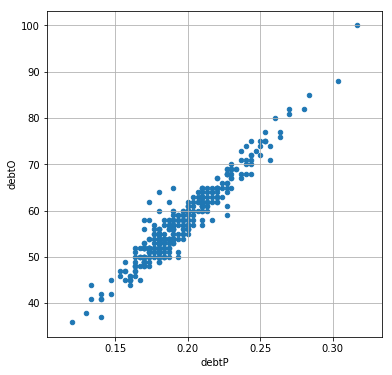

In [102]:
combined_trends.plot.scatter('debtP', 'debtO', figsize=(6, 6), grid=True);

In [103]:
combined_trends.corr()

,debtP,debtO
debtP,1.00000,0.95766
debtO,0.95766,1.00000


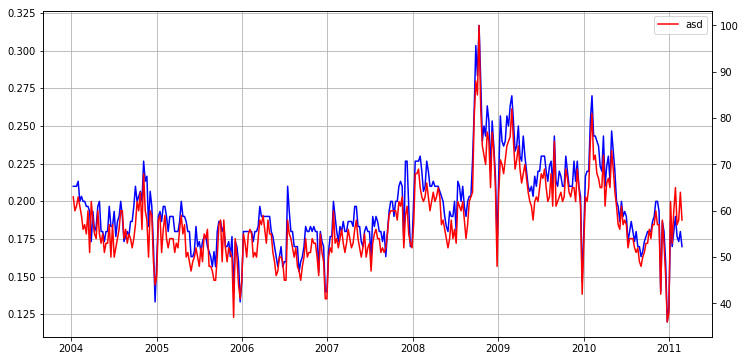

In [104]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(combined_trends.index,
         combined_trends.debtP, color='b')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(combined_trends.index,
         combined_trends.debtO, color='r')
plt.legend(['asd', 'asdf'])
plt.show()

In [105]:
final.head()

,DJIAClose,GoogleWE,debtP,Close,debtO
Date,,,,,
2004-01-12,10485.18,2004-01-10,0.210000,10485.18,63
2004-01-20,10528.66,2004-01-17,0.210000,10528.66,60
2004-01-26,10702.51,2004-01-24,0.210000,10702.51,61
2004-02-02,10499.18,2004-01-31,0.213333,10499.18,63
2004-02-09,10579.03,2004-02-07,0.200000,10579.03,61


In [107]:
base = final.reset_index().set_index('GoogleWE')
base.drop(['DJIAClose'], inplace=True, axis=1)
base.head()

,Date,debtP,Close,debtO
GoogleWE,,,,
2004-01-10,2004-01-12,0.210000,10485.18,63
2004-01-17,2004-01-20,0.210000,10528.66,60
2004-01-24,2004-01-26,0.210000,10702.51,61
2004-01-31,2004-02-02,0.213333,10499.18,63
2004-02-07,2004-02-09,0.200000,10579.03,61


In [112]:
# smas for both provided and obtained 'debt' searches

base['PMA'] = base.debtP.shift(1).rolling(window=3).mean()
base['OMA'] = base.debtO.shift(1).rolling(window=3).mean()
base.head(10)

,Date,debtP,Close,debtO,PMA,OMA
GoogleWE,,,,,,
2004-01-10,2004-01-12,0.210000,10485.18,63,NaN,NaN
2004-01-17,2004-01-20,0.210000,10528.66,60,NaN,NaN
2004-01-24,2004-01-26,0.210000,10702.51,61,NaN,NaN
2004-01-31,2004-02-02,0.213333,10499.18,63,0.210000,61.333333
2004-02-07,2004-02-09,0.200000,10579.03,61,0.211111,61.333333
2004-02-14,2004-02-17,0.203333,10714.88,59,0.207778,61.666667
2004-02-21,2004-02-23,0.200000,10609.62,56,0.205555,61.000000
2004-02-28,2004-03-01,0.200000,10678.14,57,0.201111,58.666667
2004-03-06,2004-03-08,0.196667,10529.48,55,0.201111,57.333333


In [124]:
# generating the order signals

base['signal0'] = 0 # default to 0
base.loc[base.debtP > base.PMA, 'signal0'] = -1
base.loc[base.debtP < base.PMA, 'signal0'] = 1

base['signal1'] = 0 # default to 0
base.loc[base.debtO > base.OMA, 'signal1'] = -1
base.loc[base.debtO < base.OMA, 'signal1'] = 1

base[['debtP', 'PMA', 'signal0', 'debtO', 'OMA', 'signal1']]

,debtP,PMA,signal0,debtO,OMA,signal1
GoogleWE,,,,,,
2004-01-10,0.210000,NaN,0,63,NaN,0
2004-01-17,0.210000,NaN,0,60,NaN,0
2004-01-24,0.210000,NaN,0,61,NaN,0
2004-01-31,0.213333,0.210000,-1,63,61.333333,-1
2004-02-07,0.200000,0.211111,1,61,61.333333,1
...,...,...,...,...,...,...
2011-01-29,0.190000,0.178889,-1,65,58.333333,-1
2011-02-05,0.176667,0.180000,1,57,59.333333,1
2011-02-12,0.173333,0.182222,1,58,60.666667,1


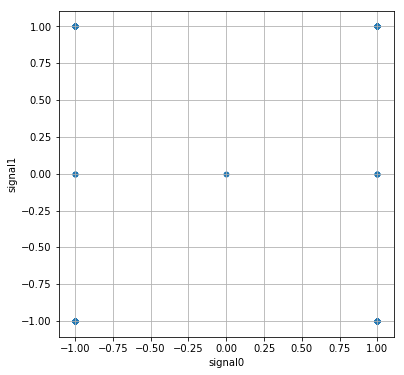

In [125]:
base.plot.scatter('signal0', 'signal1', figsize=(6, 6), grid=True);

In [126]:
base[['signal0', 'signal1']].corr()

,signal0,signal1
signal0,1.000000,0.587847
signal1,0.587847,1.000000


In [130]:
# computing returns

# to get the pct change from this week to the next
base['PctChg'] = base.Close.pct_change().shift(-1) 

base[['Close', 'PctChg', 'signal0', 'signal1']][:5]

,Close,PctChg,signal0,signal1
GoogleWE,,,,
2004-01-10,10485.18,0.004147,0,0
2004-01-17,10528.66,0.016512,0,0
2004-01-24,10702.51,-0.018998,0,0
2004-01-31,10499.18,0.007605,-1,-1
2004-02-07,10579.03,0.012841,1,1


In [140]:
base['ret0'] = base.PctChg * base.signal0
base['ret1'] = base.PctChg * base.signal1
base[['Close', 'PctChg', 'signal0', 'signal1', 'ret0', 'ret1']][:5]

,Close,PctChg,signal0,signal1,ret0,ret1
GoogleWE,,,,,,
2004-01-10,10485.18,0.004147,0,0,0.000000,0.000000
2004-01-17,10528.66,0.016512,0,0,0.000000,0.000000
2004-01-24,10702.51,-0.018998,0,0,-0.000000,-0.000000
2004-01-31,10499.18,0.007605,-1,-1,-0.007605,-0.007605
2004-02-07,10579.03,0.012841,1,1,0.012841,0.012841


In [141]:
# cumulative returns

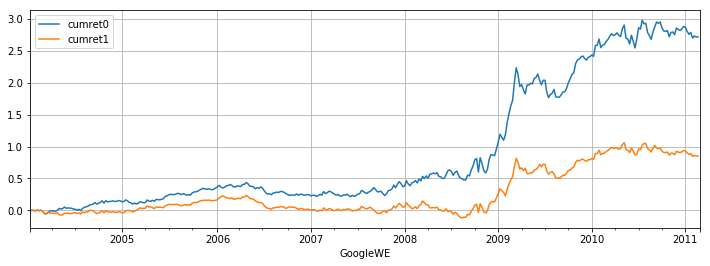

In [144]:
base['cumret0'] = (1 + base.ret0).cumprod() - 1
base['cumret1'] = (1 + base.ret1).cumprod() - 1

base[['cumret0', 'cumret1']].plot(figsize=(12, 4), grid=True);

In [33]:
# to open the github issue stating that the autocomplete function
# doesn't work when splitting long lines

import IPython
print(IPython.sys_info())

{'commit_hash': 'd86648c5d',
 'commit_source': 'installation',
 'default_encoding': 'cp1252',
 'ipython_path': 'C:\\Anaconda3\\lib\\site-packages\\IPython',
 'ipython_version': '6.1.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.15063-SP0',
 'sys_executable': 'C:\\Anaconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.6.3 |Anaconda custom (64-bit)| (default, Oct 27 2017, '
                '12:22:41) [MSC v.1900 64 bit (AMD64)]'}
